In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
# PATH
imagePath = "/content/"

In [8]:
# set the image path
ok_image_path = Path(imagePath+"1.png")
test_image_path = Path(imagePath+"6.png")  #able to change to each testing cardboard

# load and resize image
img_ok = cv2.imread(str(ok_image_path))
img_test = cv2.imread(str(test_image_path))

img_ok = cv2.resize(img_ok, (512, 768))
img_test = cv2.resize(img_test, (512, 768))

# calculate absolute difference
diff = cv2.absdiff(img_ok, img_test)
gray_diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

# binary-difference
_, thresh = cv2.threshold(gray_diff, 30, 255, cv2.THRESH_BINARY)

# difference ratio
error_percent = np.sum(thresh > 0) / thresh.size
print(f"difference ratio: {error_percent:.4f}")
print("❌NQ" if error_percent > 0.01 else "✅Q")


difference ratio: 0.2692
❌NQ


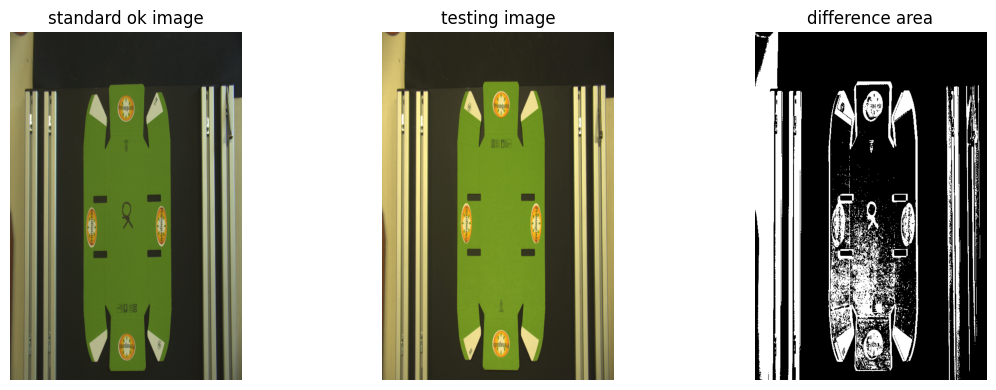

In [5]:
# visualize the difference
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("standard ok image")
plt.imshow(cv2.cvtColor(img_ok, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,3,2)
plt.title("testing image")
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,3,3)
plt.title("difference area")
plt.imshow(thresh, cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.show()
